# Chapter: Decision Trees and Ensemble Learning


# Topic: Soft Sensing via Random Forests in Concrete Construction Industry

In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
data = np.loadtxt('cement_strength.txt', delimiter=',', skiprows=1)
X = data[:,0:-1]
y = data[:,-1]

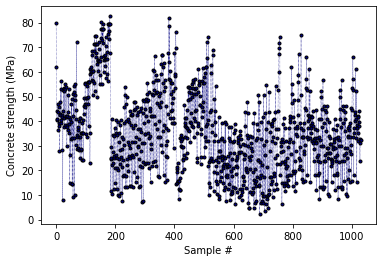

In [3]:
# plot raw output data
plt.figure()
plt.plot(y, color='navy', linestyle = ':', marker='.', linewidth=0.5, markeredgecolor = 'k')
plt.xlabel('Sample #')
plt.ylabel('Concrete strength (MPa)')
plt.show()

In [4]:
# separate training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [5]:
# fit RF model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, max_features=3, oob_score=True, random_state=1).fit(X_train, y_train)

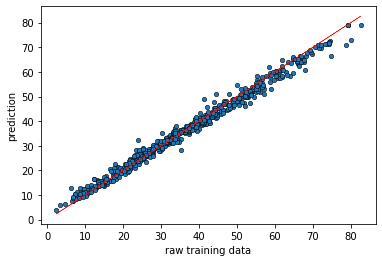

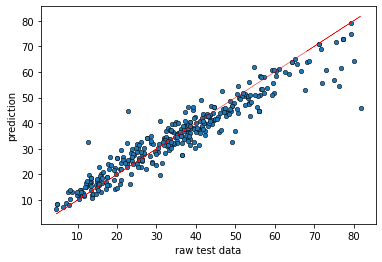

In [6]:
# predict and plot
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

plt.figure()
plt.plot(y_train, y_train_predicted, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_train, y_train, '-r', linewidth=0.5)
plt.xlabel('raw training data')
plt.ylabel('prediction')
plt.show

plt.figure()
plt.plot(y_test, y_test_predicted, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_test, y_test, '-r', linewidth=0.5)
plt.xlabel('raw test data')
plt.ylabel('prediction')
plt.show()

In [7]:
# check training vs test accuracy
from sklearn.metrics import r2_score
print('Accuracy over training data: ', r2_score(y_train, y_train_predicted))
print('Accuracy over test data: ', r2_score(y_test, y_test_predicted))

Accuracy over training data:  0.9861428750433071
Accuracy over test data:  0.9028831411148102


In [8]:
# oob_score
print('OOB score: ', model.oob_score_)

OOB score:  0.9034497211865927


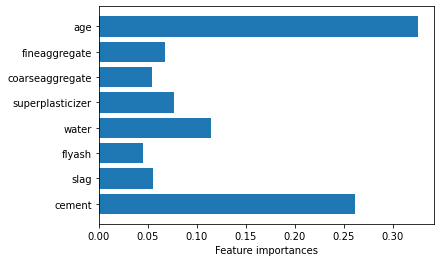

In [9]:
# feature importances
var_names = ['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']
importances = model.feature_importances_

plt.figure()
plt.barh(var_names, importances)
plt.xlabel('Feature importances')
plt.show()